Things learnt here:
- input output schemas
- Different schema and state can flow through the graph

In [1]:
%%capture --no-stderr
%pip install --quiet -U langchain_core langgraph


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from typing import TypedDict

class inputState(TypedDict):
    question : str

class outputState(TypedDict):
    answer : str

class OverallState(TypedDict):
    question : str
    answer : str
    notes : str

def thinking(state : input):
    return { "answer" : "Here is my answer", "notes" : " Here are my references"}

def output(state : OverallState):
    return {"answer": "Here is my answer"}

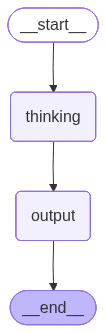

{'answer': 'Here is my answer'}

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


In [19]:
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

builder = StateGraph(OverallState, input_schema=inputState, output_schema= outputState)
builder.add_node("thinking", thinking)
builder.add_node("output", output)

builder.add_edge(START, "thinking")
builder.add_edge("thinking", "output")
builder.add_edge("output", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

graph.invoke({"question": "Hi"})